# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pypslot as plt
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Checking for NULL Values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Correlation between features

<AxesSubplot:>

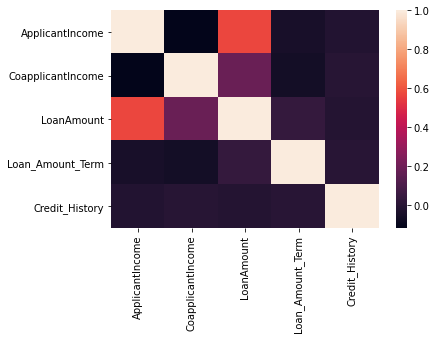

In [5]:
sns.heatmap(df.corr())

# Filling Null Values with Mean Values

In [6]:
df=df.fillna(df.median())

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Encoding the Gender Feature

In [8]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
gender

,Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

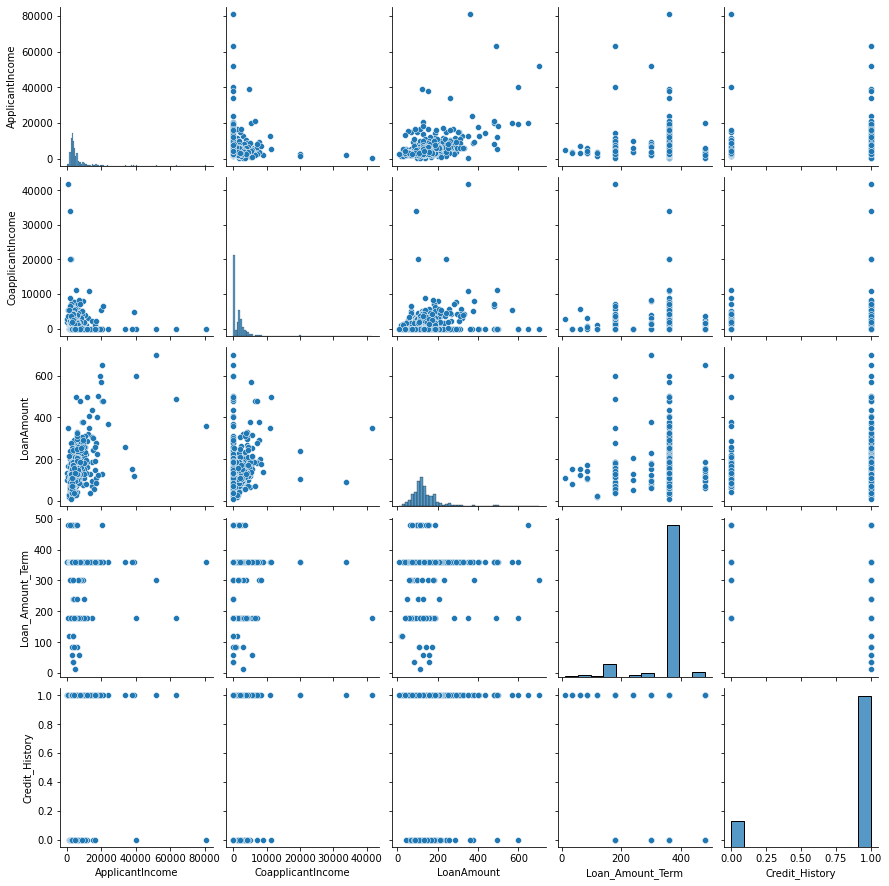

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='count', ylabel='Gender'>

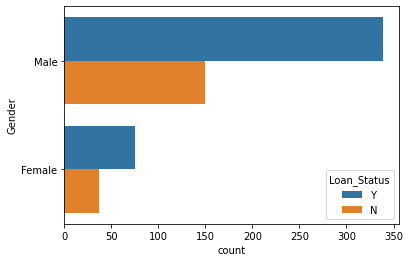

In [12]:
sns.countplot(y='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='count', ylabel='Married'>

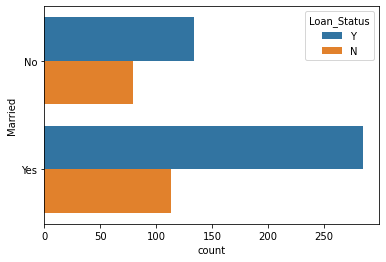

In [13]:
sns.countplot(y='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

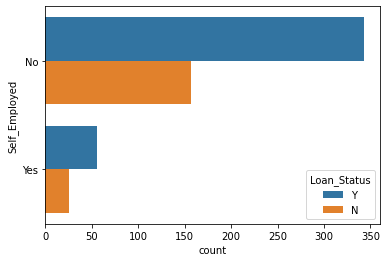

In [14]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

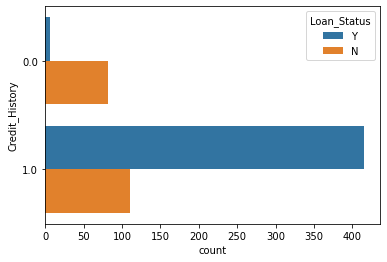

In [15]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

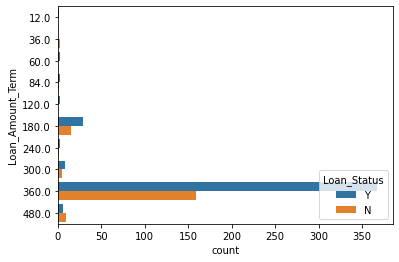

In [16]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df)

# Converting Categorical Features into Numerical

In [17]:
dummy_df=pd.get_dummies(df,columns=['Gender','Married','Dependents','Self_Employed'])

In [18]:
dummy_df

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,LP001002,Graduate,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0
1,LP001003,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0,0,1,0
2,LP001005,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,0,1
3,LP001006,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,1,0
4,LP001008,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0,1,0,1,0,0,0,1,0
610,LP002979,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,0,1,0,0,0,1,1,0
611,LP002983,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1,0,1,0,1,0,0,1,0
612,LP002984,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,0,1,0,0,1,0,1,0


In [19]:
dummy_df.drop(['Loan_ID','Gender_Female','Married_No','Self_Employed_No'],axis=1,inplace=True)

In [20]:
dummy_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,Graduate,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,1,0,0,0
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,0
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,0,0,0
610,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,0,1,0
611,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,0,1,0,0,0
612,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0


In [21]:
edu=pd.get_dummies(dummy_df['Education'])
edu
dummy_df=pd.concat([dummy_df,edu],axis=1)

In [22]:
dummy_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Graduate,Not Graduate
0,Graduate,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0,1,0
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,1,0,0,0,1,0
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1,1,0
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,0,0,1
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,0,0,0,1,0
610,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,0,1,0,1,0
611,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,0,1,0,0,0,1,0
612,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,1,0


In [23]:
dummy_df.drop('Education',axis=1,inplace=True)

In [24]:
dummy_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Graduate,Not Graduate
0,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,1,0,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1,1,0
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,0,0,0,1,0
610,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,0,1,0,1,0
611,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,0,1,0,0,0,1,0
612,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,1,0


In [25]:
pro=pd.get_dummies(dummy_df['Property_Area'])
pro
dummy_df=pd.concat([dummy_df,pro],axis=1)
dummy_df.drop('Property_Area',axis=1,inplace=True)
dummy_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Graduate,Not Graduate,Rural,Semiurban,Urban
0,5849,0.0,128.0,360.0,1.0,Y,1,0,1,0,0,0,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,1,0,0,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,0,0,1,0,0,0,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,Y,1,1,0,1,0,0,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Y,1,1,0,0,1,0,0,1,0,0,0,1


In [26]:
ls=pd.get_dummies(dummy_df['Loan_Status'],drop_first=True)
ls
dummy_df=pd.concat([dummy_df,ls],axis=1)
dummy_df.drop('Loan_Status',axis=1,inplace=True)
dummy_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Graduate,Not Graduate,Rural,Semiurban,Urban,Y
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1,0,1,0,1,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,0,1,0,0,0,1,1


In [27]:
dummy_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender_Male          0
Married_Yes          0
Dependents_0         0
Dependents_1         0
Dependents_2         0
Dependents_3+        0
Self_Employed_Yes    0
Graduate             0
Not Graduate         0
Rural                0
Semiurban            0
Urban                0
Y                    0
dtype: int64

# Training Machine Learning Models :
### 1. Logistic Regression
### 2. Random Forest
### 3. Support Vector Machine

# Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=dummy_df.drop('Y',axis=1)
y=dummy_df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg=LogisticRegression()

In [32]:
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred=logreg.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[ 26  38]
 [  3 118]]


              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test,pred)

0.851985559566787

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier(n_estimators=300)

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [41]:
pred_rfc=rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,pred_rfc))
print("\n")
print(classification_report(y_test,pred_rfc))

[[ 27  37]
 [  6 115]]


              precision    recall  f1-score   support

           0       0.82      0.42      0.56        64
           1       0.76      0.95      0.84       121

    accuracy                           0.77       185
   macro avg       0.79      0.69      0.70       185
weighted avg       0.78      0.77      0.74       185



In [43]:
f1_score(y_test,pred_rfc)

0.8424908424908425

# Support Vector Machine

In [44]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [45]:
pred_svc=svc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred_svc))
print("\n")
print(classification_report(y_test,pred_svc))

[[  0  64]
 [  0 121]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.65      1.00      0.79       121

    accuracy                           0.65       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.65      0.52       185



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
f1_score(y_test,pred_svc)

0.7908496732026143

# Machine Learning - Predicting Loan Amount

In [48]:
X=dummy_df.drop('LoanAmount',axis=1)
y=dummy_df['LoanAmount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression - Loan Amount

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression(normalize=False)

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
predi=lr.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,r2_score

In [54]:
mean_absolute_error(np.array(y_test).reshape(-1,1),predi.reshape(-1,1))

40.19137069314789

In [55]:
r2_score(np.array(y_test).reshape(-1,1),predi.reshape(-1,1))

0.4468077054578675

# SVM Regression - Loan Amount

In [56]:
from sklearn.svm import SVR

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [60]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.042, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.036, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.055, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.049, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.051, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.042, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.054, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.048, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.051, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.041, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.036, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.054, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.048, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ....... C=100, gamma=0.1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.018, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.005, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=100, gamma=0.1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.023, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=100, gamma=0.01, kernel=rbf, score=-0.010, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.036, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.8s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [61]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVR(C=100, gamma=0.0001)

In [63]:
grid_predictions = grid.predict(X_test)

In [64]:
from sklearn import metrics

In [65]:
r2_score(y_test,grid_predictions)*100

8.846590236699459

In [66]:
regressor = SVR(kernel = 'rbf')

In [67]:
regressor.fit(X_train,y_train)

SVR()

In [68]:
predr=regressor.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
mean_absolute_error(y_test,predr)

43.36693614508013

In [71]:
r2_score(y_test,predr)

0.11974184036956126